In [1]:
import numpy as np 
import pandas as pd
from tqdm import tqdm_notebook

In [6]:
cd severstal-steel-defect-detection

C:\Users\Naveen\desktop\project\severstal-steel-defect-detection


In [7]:
df = pd.read_csv("train.csv")

In [8]:
df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [9]:
legacy_df = pd.DataFrame(columns=['ImageId_ClassId', 'EncodedPixels'])

for img_id, img_df in tqdm_notebook(df.groupby('ImageId')):
    for i in range(1, 5):
        avail_classes = list(img_df.ClassId)

        row = dict()
        row['ImageId_ClassId'] = img_id + '_' + str(i)

        if i in avail_classes:
            row['EncodedPixels'] = img_df.loc[img_df.ClassId == i].EncodedPixels.iloc[0]
        else:
            row['EncodedPixels'] = np.nan
        
        legacy_df = legacy_df.append(row, ignore_index=True)

<ipython-input-9-05bf9defda95>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img_id, img_df in tqdm_notebook(df.groupby('ImageId')):


In [10]:
legacy_df.head()

,ImageId_ClassId,EncodedPixels
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg_2,NaN
2,0002cc93b.jpg_3,NaN
3,0002cc93b.jpg_4,NaN
4,0007a71bf.jpg_1,NaN


In [11]:
data = legacy_df

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ImageId_ClassId  26664 non-null  object
 1   EncodedPixels    7095 non-null   object
dtypes: object(2)
memory usage: 416.8+ KB


In [12]:
defects = data[pd.notna(data.EncodedPixels)]
defects.EncodedPixels = 1
defects.info()
print(defects)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7095 entries, 0 to 26662
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ImageId_ClassId  7095 non-null   object
 1   EncodedPixels    7095 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 166.3+ KB
       ImageId_ClassId  EncodedPixels
0      0002cc93b.jpg_1              1
6      0007a71bf.jpg_3              1
8      000a4bcdd.jpg_1              1
15     000f6bf48.jpg_4              1
18     0014fce06.jpg_3              1
...                ...            ...
26646  ffcf72ecf.jpg_3              1
26650  fff02e9c5.jpg_3              1
26654  fffe98443.jpg_3              1
26658  ffff4eaa8.jpg_3              1
26662  ffffd67df.jpg_3              1

[7095 rows x 2 columns]


C:\Users\Naveen\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
print((data.EncodedPixels).isnull())
NoDefects = data[(data.EncodedPixels).isnull()]
NoDefects.EncodedPixels = 0
NoDefects.info()
print(NoDefects)

0        False
1         True
2         True
3         True
4         True
         ...  
26659     True
26660     True
26661     True
26662    False
26663     True
Name: EncodedPixels, Length: 26664, dtype: bool
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19569 entries, 1 to 26663
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ImageId_ClassId  19569 non-null  object
 1   EncodedPixels    19569 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 458.6+ KB
       ImageId_ClassId  EncodedPixels
1      0002cc93b.jpg_2              0
2      0002cc93b.jpg_3              0
3      0002cc93b.jpg_4              0
4      0007a71bf.jpg_1              0
5      0007a71bf.jpg_2              0
...                ...            ...
26657  ffff4eaa8.jpg_2              0
26659  ffff4eaa8.jpg_4              0
26660  ffffd67df.jpg_1              0
26661  ffffd67df.jpg_2              0
26663  ffffd67df.jpg_4       

C:\Users\Naveen\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
dataset= NoDefects.sample(defects.shape[0])
dataset = dataset.append(defects,ignore_index=True)
dataset = dataset.sample(frac=1, replace=True, random_state=1)
dataset

,ImageId_ClassId,EncodedPixels
13349,e07c94229.jpg_3,1
235,4ef65d75b.jpg_1,0
12172,b7871011a.jpg_1,1
5192,172b72353.jpg_1,0
905,a10a35f4f.jpg_1,0
...,...,...
10505,7c6e58a02.jpg_3,1
11321,9a064450d.jpg_3,1
7043,e4c74d00a.jpg_1,0
9764,62d9fd113.jpg_3,1


In [15]:
cd train_images

C:\Users\Naveen\desktop\project\severstal-steel-defect-detection\train_images


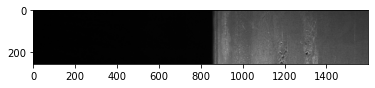

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
filename = str(dataset.sample(1).ImageId_ClassId.values)[2:]
filename = filename[:-4]
img=mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

In [17]:
val = dataset[0:1000]
test = dataset[1000:2000]
train = dataset[2000:]
train.info

<bound method DataFrame.info of        ImageId_ClassId  EncodedPixels
13781  f0dc068a8.jpg_3              1
6923   b04b907b2.jpg_4              0
12253  ba11c9dc3.jpg_3              1
53     a8bc0275d.jpg_2              0
12091  b4d920147.jpg_3              1
...                ...            ...
10505  7c6e58a02.jpg_3              1
11321  9a064450d.jpg_3              1
7043   e4c74d00a.jpg_1              0
9764   62d9fd113.jpg_3              1
8479   328c0fc75.jpg_3              1

[12190 rows x 2 columns]>

In [18]:
!pip install opencv-python

In [19]:
from skimage.feature import hog
import cv2

def my_extractHOG(filename):
    filename = str(filename)
    filename = filename[:-2]
    img = mpimg.imread(filename)
    img = cv2.resize(img, dsize=(600, 70), interpolation=cv2.INTER_CUBIC)
    print(str(i)+"/"+str(train.ImageId_ClassId.shape[0]))
    img = img / 256
    fd,hog_image = hog(img, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
    return fd,hog_image

ppc = 16
hog_images = []
hog_features = []

for i, filename in enumerate(train.ImageId_ClassId):
    fd,hog_image = my_extractHOG(filename)
    if i<6 : hog_images.append(hog_image)
    hog_features.append(fd)

0/12190
1/12190
2/12190
3/12190
4/12190
5/12190
6/12190
7/12190
8/12190
9/12190
10/12190
11/12190
12/12190
13/12190
14/12190
15/12190
16/12190
17/12190
18/12190
19/12190
20/12190
21/12190
22/12190
23/12190
24/12190
25/12190
26/12190
27/12190
28/12190
29/12190
30/12190
31/12190
32/12190
33/12190
34/12190
35/12190
36/12190
37/12190
38/12190
39/12190
40/12190
41/12190
42/12190
43/12190
44/12190
45/12190
46/12190
47/12190
48/12190
49/12190
50/12190
51/12190
52/12190
53/12190
54/12190
55/12190
56/12190
57/12190
58/12190
59/12190
60/12190
61/12190
62/12190
63/12190
64/12190
65/12190
66/12190
67/12190
68/12190
69/12190
70/12190
71/12190
72/12190
73/12190
74/12190
75/12190
76/12190
77/12190
78/12190
79/12190
80/12190
81/12190
82/12190
83/12190
84/12190
85/12190
86/12190
87/12190
88/12190
89/12190
90/12190
91/12190
92/12190
93/12190
94/12190
95/12190
96/12190
97/12190
98/12190
99/12190
100/12190
101/12190
102/12190
103/12190
104/12190
105/12190
106/12190
107/12190
108/12190
109/12190
110/12190


(4352,)


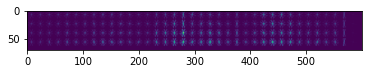

In [20]:
plt.imshow(hog_images[3])
print(hog_features[3].shape)

In [21]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
print(train.EncodedPixels.values.shape)
y = train.EncodedPixels.values
X = np.array(hog_features)
print(X.shape)
clf.fit(X,y)

(12190,)
(12190, 4352)


SVC(gamma='auto')

In [22]:
from sklearn.metrics import roc_auc_score
y_scores = [] # init array
hog_features2 = []
for i, filename in enumerate(test.ImageId_ClassId):
    fd,hog_image = my_extractHOG(filename)
    out = clf.predict([np.array(fd)])
    y_scores.append(out)
    print(len(y_scores))
    hog_features2.append(fd)
y_true = test.EncodedPixels.values
y_scores = np.array(y_scores)
roc_auc_score(y_true, y_scores)

0/12190
1
1/12190
2
2/12190
3
3/12190
4
4/12190
5
5/12190
6
6/12190
7
7/12190
8
8/12190
9
9/12190
10
10/12190
11
11/12190
12
12/12190
13
13/12190
14
14/12190
15
15/12190
16
16/12190
17
17/12190
18
18/12190
19
19/12190
20
20/12190
21
21/12190
22
22/12190
23
23/12190
24
24/12190
25
25/12190
26
26/12190
27
27/12190
28
28/12190
29
29/12190
30
30/12190
31
31/12190
32
32/12190
33
33/12190
34
34/12190
35
35/12190
36
36/12190
37
37/12190
38
38/12190
39
39/12190
40
40/12190
41
41/12190
42
42/12190
43
43/12190
44
44/12190
45
45/12190
46
46/12190
47
47/12190
48
48/12190
49
49/12190
50
50/12190
51
51/12190
52
52/12190
53
53/12190
54
54/12190
55
55/12190
56
56/12190
57
57/12190
58
58/12190
59
59/12190
60
60/12190
61
61/12190
62
62/12190
63
63/12190
64
64/12190
65
65/12190
66
66/12190
67
67/12190
68
68/12190
69
69/12190
70
70/12190
71
71/12190
72
72/12190
73
73/12190
74
74/12190
75
75/12190
76
76/12190
77
77/12190
78
78/12190
79
79/12190
80
80/12190
81
81/12190
82
82/12190
83
83/12190
84
84/12190
85

0.5

In [23]:
!pip install catboost

In [24]:
from catboost import CatBoostClassifier, Pool
cat_features = [0]
X = 10000 * X
X = X.astype(int)
print(X)
y.astype(int)
print(y)
Xval = 10000*np.array(hog_features2)
print(Xval)

[[ 455  437  470 ...  720  675  773]
 [ 526  209  369 ...  507 1000  894]
 [ 784  742  720 ...  391 1085  825]
 ...
 [ 855  359  618 ...  368  434  227]
 [ 769  266  519 ...  937 1179 1187]
 [ 250  137  146 ...  598 1008 1672]]
[1 0 1 ... 0 1 1]
[[1401.97505523    0.          616.83744668 ...  476.45376354
   384.90977184  372.44558092]
 [1512.57238956    0.          415.93615427 ...  373.06185429
   275.95599744  329.6152682 ]
 [ 647.62307839  700.51673085  565.69024116 ...    0.
   366.45199187    0.        ]
 ...
 [ 907.78662749    0.          778.06296987 ...  585.96217591
   799.48323603  819.74308015]
 [ 966.42422813  778.57082875  814.40497805 ...  513.96224641
   501.69907585  684.51832141]
 [ 488.37821355  381.86306331  325.43284803 ...  996.09696149
   759.29590978  331.49534487]]


In [25]:
train_dataset = Pool(data=X,
                     label=y,
                     cat_features=cat_features)

eval_dataset = Pool(data=Xval.astype(int),
                    label=y_true,
                    cat_features=cat_features)

model = CatBoostClassifier(iterations=300,
                           learning_rate=1,
                           depth=2,
                           custom_metric='AUC')
model.fit(train_dataset, eval_set=eval_dataset, use_best_model=True)
preds_class = model.predict(eval_dataset)
print(preds_class)
preds_proba = model.predict_proba(eval_dataset)
preds_raw = model.predict(eval_dataset,
                          prediction_type='RawFormulaVal')
print(model.get_best_score())
model.save_model('1layer_catboost')

0:	learn: 0.6921277	test: 0.6918453	best: 0.6918453 (0)	total: 337ms	remaining: 1m 40s
1:	learn: 0.6906299	test: 0.6925034	best: 0.6918453 (0)	total: 451ms	remaining: 1m 7s
2:	learn: 0.6896212	test: 0.6955866	best: 0.6918453 (0)	total: 567ms	remaining: 56.2s
3:	learn: 0.6883423	test: 0.6959990	best: 0.6918453 (0)	total: 694ms	remaining: 51.4s
4:	learn: 0.6872314	test: 0.6966085	best: 0.6918453 (0)	total: 830ms	remaining: 49s
5:	learn: 0.6865675	test: 0.6974479	best: 0.6918453 (0)	total: 967ms	remaining: 47.4s
6:	learn: 0.6856703	test: 0.6989426	best: 0.6918453 (0)	total: 1.17s	remaining: 48.9s
7:	learn: 0.6840790	test: 0.7009414	best: 0.6918453 (0)	total: 1.33s	remaining: 48.5s
8:	learn: 0.6819283	test: 0.6987378	best: 0.6918453 (0)	total: 1.47s	remaining: 47.4s
9:	learn: 0.6807123	test: 0.6995787	best: 0.6918453 (0)	total: 1.59s	remaining: 46.2s
10:	learn: 0.6791658	test: 0.7001638	best: 0.6918453 (0)	total: 1.74s	remaining: 45.6s
11:	learn: 0.6778576	test: 0.7000234	best: 0.6918453 (